In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.dates as mdates

# Read Data

In [2]:
coal_train_data = pd.read_csv('Data/COALINDIA TRAIN.csv')

In [3]:
coal_train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2011,315.500000,318.0,314.549988,317.299988,129.144241,2929118.0
1,04-01-2011,318.899994,320.0,316.049988,319.200012,129.917557,2716995.0
2,05-01-2011,320.000000,320.0,308.250000,309.799988,126.091690,8555905.0
3,06-01-2011,311.000000,313.0,308.500000,309.100006,125.806793,2763146.0
4,07-01-2011,310.000000,313.5,302.149994,309.100006,125.806793,2298583.0


# Checking null values

In [4]:
coal_train_data.isna().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

# Dropping null values

In [5]:
coal_train_data.dropna(inplace=True)

In [6]:
coal_train_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Preparing data

In [7]:
X_train = coal_train_data[['Open','High','Low','Volume']]

In [8]:
X_train.head()

,Open,High,Low,Volume
0,315.500000,318.0,314.549988,2929118.0
1,318.899994,320.0,316.049988,2716995.0
2,320.000000,320.0,308.250000,8555905.0
3,311.000000,313.0,308.500000,2763146.0
4,310.000000,313.5,302.149994,2298583.0


In [9]:
Y_train = coal_train_data['Close']

In [10]:
Y_train.head()

0    317.299988
1    319.200012
2    309.799988
3    309.100006
4    309.100006
Name: Close, dtype: float64

# Model Training

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train,Y_train)

LinearRegression()

# Testing

In [13]:
coal_test_data = pd.read_csv('Data/COALINDIA TEST.csv')

In [14]:
coal_test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2023,226.750000,227.199997,224.149994,224.750000,219.379318,4210225.0
1,03-01-2023,225.000000,225.750000,223.000000,224.100006,218.744858,3643132.0
2,04-01-2023,224.350006,224.500000,216.250000,217.149994,211.960938,9550461.0
3,05-01-2023,216.800003,218.899994,215.199997,218.149994,212.937027,8815728.0
4,06-01-2023,219.000000,219.899994,212.000000,214.250000,209.130234,12237065.0


In [15]:
coal_test_data.isna().sum()

Date         186
Open         186
High         186
Low          186
Close        186
Adj Close    186
Volume       186
dtype: int64

In [16]:
null_rows = coal_test_data[coal_test_data.isnull().any(axis=1)].head(7)
null_rows 

,Date,Open,High,Low,Close,Adj Close,Volume
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
coal_test_data.dropna(inplace=True)

In [18]:
coal_test_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
coal_test_data.shape

(62, 7)

In [20]:
coal_test_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
57,24-03-2023,213.250000,213.899994,208.000000,208.449997,208.449997,6611089.0
58,27-03-2023,208.500000,210.199997,207.600006,208.399994,208.399994,4002212.0
59,28-03-2023,209.399994,211.250000,208.449997,208.899994,208.899994,6157526.0
60,29-03-2023,209.949997,214.899994,208.399994,212.949997,212.949997,16734166.0
61,31-03-2023,212.199997,214.300003,211.149994,213.649994,213.649994,5139018.0


In [21]:
X_test = coal_test_data[['Open','High','Low','Volume']]

In [22]:
X_test.head()

,Open,High,Low,Volume
0,226.750000,227.199997,224.149994,4210225.0
1,225.000000,225.750000,223.000000,3643132.0
2,224.350006,224.500000,216.250000,9550461.0
3,216.800003,218.899994,215.199997,8815728.0
4,219.000000,219.899994,212.000000,12237065.0


In [23]:
Y_test = coal_test_data['Close']

In [24]:
Y_pred = model.predict(X_test)

In [25]:
Y_pred.shape

(62,)

# Error Metrics

In [26]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 0.9570779925056833
Mean Squared Error: 1.2467162217737893
Root Mean Squared Error: 1.1165644727349107
R-squared (R2) Score: 0.9520231379366484


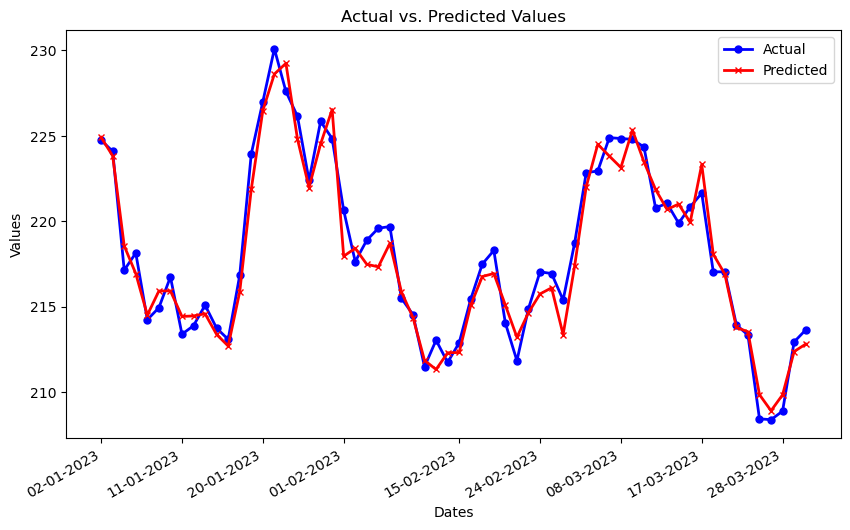

In [29]:
x = coal_test_data['Date']
plt.figure(figsize=(10, 6))
plt.plot(x,Y_test, label='Actual', color='blue', marker='o', markersize=5, linewidth=2)
plt.plot(x,Y_pred, label='Predicted', color='red', marker='x', markersize=5, linewidth=2)

# Set axis labels and title
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
locator = mdates.AutoDateLocator()
# Add legend
plt.legend()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()
